In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import os

from utils.image_helpers import plot_image_grid, get_images, load_image, rgb2gray, show_images
from simulation.Simulation import Simulation
from models.model_creation import create_model_from_configuration
from fitting.Fitter import create_fitter_from_configuration
from utils.configuration_parser.fit_model_configuration import get_fit_model_configuration

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor

num GPUs 1


(256, 256)


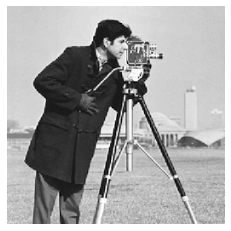

In [2]:
original_rgb_image = load_image('data/raw_images/sample_images/cameraman.png')
original_image = rgb2gray(original_rgb_image)
print(original_image.shape)
plt.imshow(original_image, 'gray')
plt.axis('off')
plt.show()

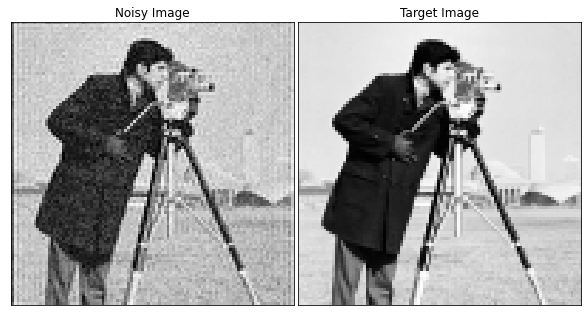

In [3]:
input_size = original_image.shape
cropped_size = (100, 100)
simulation = Simulation(input_size=input_size, cropped_size=cropped_size, snr_range=(4,4))
noisy_image, target_image = simulation(original_image)
plot_image_grid([noisy_image, target_image], ['Noisy Image', 'Target Image'], ncols=2)
plt.show()

In [4]:
fit_model_configuration = get_fit_model_configuration()
fit_model_configuration.image_dimensions = list(cropped_size) + [1]
fit_model_configuration.log_frequency = 100
fit_model_configuration.number_of_iterations = 5000
fit_model_configuration.convergence_check_length = None

fit_model_configuration.input_shape = [16, 16]
fit_model_configuration.number_of_layers = 13
fit_model_configuration.number_of_hidden_channels = 128
print(fit_model_configuration)

image_dimensions: [100, 100, 1]  
result_path: data/results/  
model_type: deep  
input_shape: [16, 16]  
number_of_layers: 13  
number_of_hidden_channels: 128  
number_of_iterations: 5000  
learning_rate: 0.1  
convergence_check_length: None  
log_frequency: 100  
find_best: True  
save_losses: True  
constant_input: False  
data_type: <class 'torch.cuda.FloatTensor'>  



In [5]:
model = create_model_from_configuration(fit_model_configuration)
fitter = create_fitter_from_configuration(fit_model_configuration)

In [6]:
fitter(model, noisy_image, target_image)

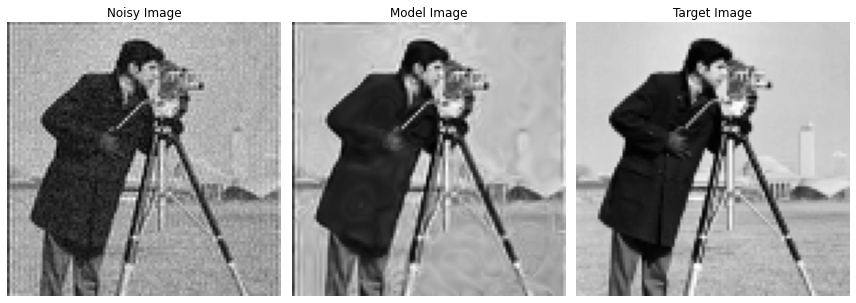

In [7]:
model_image = fitter.get_best_image()
show_images(noisy_image, model_image, target_image)

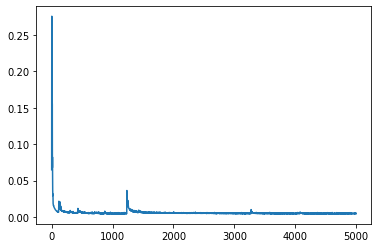

In [8]:
plt.plot(fitter.losses_wrt_target)